## Homer Shawsdi and Bob Richter's entry. 
#### They are active participants in the working group, just starting their data science journey. 



##### A machine learning replacement of the Kalman Filter. 
##### This code was in part taken from instructor Jesse Passmore's class work. 

In [ ]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load Appropriate Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
import math, time
from sklearn.metrics import mean_squared_error
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
# Copy relevant data over (here, we'll be using the raw dataset).
!cp /content/drive/MyDrive/Kalman_Filter/combined_sentinel_cleaned.csv /content/ # Note! This is the cleaned dataset, the 2 std dev dataset.

In [ ]:
# Step 0 is always loading and isolating the relevant data.
df = pd.read_csv("combined_sentinel_cleaned.csv")


In [ ]:
df = df.drop(columns=['Unnamed: 0'], axis=1)
df.head(2)

,date,lake,latitude,longitude,orbit,water_level
0,20160403,Athabasca,59.244637,-108.047469,303,208.303892
1,20160403,Athabasca,59.247528,-108.049405,303,208.131251


#### Take the raw data as one set of readings, and the rolling mean as another set. 

In [ ]:
# Create a list of the available lakes. 
lake_list = []
for l in df.lake.unique():
  lake_list.append(l)
lake_list[0]

'Athabasca'

In [ ]:
# Create a function for scoring; combining a rolling mean with the cleaned dataset. 
def scoring(lake_name):
  data = df[(df.lake == lake_name)]
  # Create a list for water levels
  water_list = []
  # Create a total of for accumulated water levels
  total = 0
  # Create a list of rolling means. 
  rolling_means = []
  # Iterate through a given lake's water levels. 
  date_uni = data.date.unique()
  for i in date_uni: 
    water = data[(data.date == i)].water_level.mean()
    water_list.append(water)
    total += float(water)
    rolling_mean = total / len(water_list) # This is much, much faster than using np.mean()
    rolling_means.append(rolling_mean)

  lake_name['rolling_mean'] = rolling_means
  return lake_name

In [ ]:
# Create a function to produce the needed lists, and a graph for visual representation.
def scoring(lake_name):
  name = df[(df.lake == lake_name)]
  unique = name.date.unique()

  water_means = []
  rolling_means = []
  total = 0
  for i in unique: 
    mean = name[(name.date == i)].water_level.mean()
    water_means.append(mean)
    total += mean
    roll = total / len(water_means)
    rolling_means.append(roll)

  # Average the two together. 
  average = []
  for i in range(len(water_means)):
    avg = (water_means[i] + rolling_means[i])/2
    average.append(avg)
  # Graph the resultant lists. 
  x = range(len(water_means))
  y = water_means
  y2 = rolling_means
  y3 = average
  f = plt.figure()
  f.set_figwidth(30)
  f.set_figheight(10)
  plt.title("Lake Athabasca")
  plt.xlabel("Time Steps forward from April 1, 2016 (roughly every 3 days)")
  plt.ylabel("Water Levels (meters)")
  plt.plot(y, label = 'Recorded Water Levels')
  plt.plot(y2, label = 'Rolling Means') 
  plt.plot(y3, label = 'Average') 

  plt.legend()
  plt.show()
  



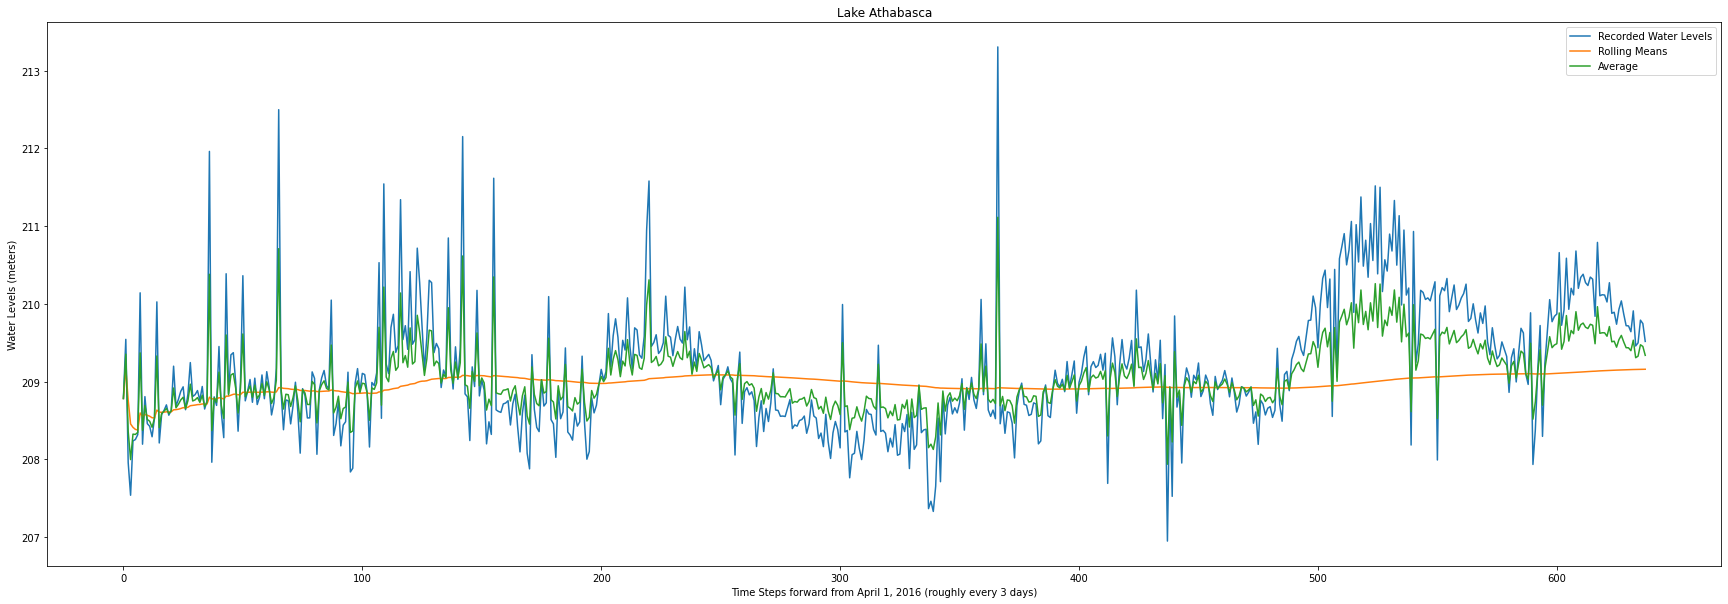

In [ ]:
test = scoring('Athabasca')

In [ ]:
  name = lake_list[0]
  unique = df[(df.lake == name)].date.unique()
  water_means = []
  rolling_means = []
  total = 0
  for i in unique: 
    mean = df[(df.date == i)].water_level.mean()
    water_means.append(mean)
    total += mean
    roll = total / len(water_means)
    rolling_means.append(roll)

  # Average the two together. 
  average = []
  for i in range(len(water_means)):
    avg = (water_means[i] + rolling_means[i])/2
    average.append(avg)

In [ ]:
# Import relevant libraries
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import math, time
from sklearn.metrics import mean_squared_error
import plotly.express as px
import plotly.graph_objects as go

# Q: Why are you importing all these libraries again? 
# A: We didn't bother to see what changed between your tutorials. 
# S: --> I appreciate the honesty. 

In [ ]:
# Import Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Q: Why are you importing Google Drive again? 
# A: ...
# S: --> It's ok to copy someone else's work as you learn, but it is very important to understand what's going on inside the work. 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train = average[:156]
test = average[156:]
# Q: Why split at 156, when the dataset is length over 600? 
# A: This was the split in the Kaggle tutorial. 
# S: --> The dataset in question, was likely much shorter than 600. A good test split is 20-30%.


482

In [ ]:
copy = pd.DataFrame(average)
copy.rename({0: 'avg'}, axis=1, inplace=True)
copy.head()
# Q: Why convert the list into a pandas dataframe? 
# A: Unsure how to proceed without converting to dataframe. 
# S: Fair enough. 

,avg
0,201.256444
1,177.664791
2,174.976685
3,174.496417
4,182.823425


In [ ]:
import xgboost as xgb 


In [ ]:
# Instantiate the model.
reg = xgb.XGBRegressor(n_estimators=1000, learning_rate=0.01)

# Q: Why so many estimators for a short, linear dataset? This will result in gross overfitting. 
# A: Just a first stab at the model. It seems to produce good results. 
# S: In our specific usecase, the problem of overfitting is hidden by the very short prediction window. But these parameters trap your model's usefulness. 

In [ ]:
num = 20
predict = copy.iloc[num-20:num-1] 
target = copy.avg.iloc[num-19:num]
print("The first predictors will be:\n", predict.iloc[0],"\n \nAnd the first target will be:", target.iloc[0])

The first predictors will be:
 avg    201.256444
Name: 0, dtype: float64 
 
And the first target will be: 177.66479097991902


In [ ]:
# Create the loop that will predict the next day's discharge. 
pred_list = [] # Create a list to store the predictions. 
for i in range(len(copy)):
  if i >= 20:
    num = i
    predict = copy.iloc[num-20:num-1] # Three years of data will be taken into account for each prediction. Up to three days before the target is taken. 
    target = copy.avg.iloc[num-19:num] # A three day prediction. 
    reg.fit(predict, target) 
    predictions = reg.predict(predict)
    day = predictions[18]
    pred_list.append(day) # Append the predictions to the list, for graphing. 

[18:40:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:40:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:40:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:40:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:40:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:40:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:40:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:40:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
# Observe if the correct number of values are stored, and what they are. 
print(len(pred_list), pred_list[0:10])

618 [191.84378, 194.07428, 180.06767, 180.62373, 177.90042, 197.38892, 185.8533, 190.70633, 194.94695, 181.1615]


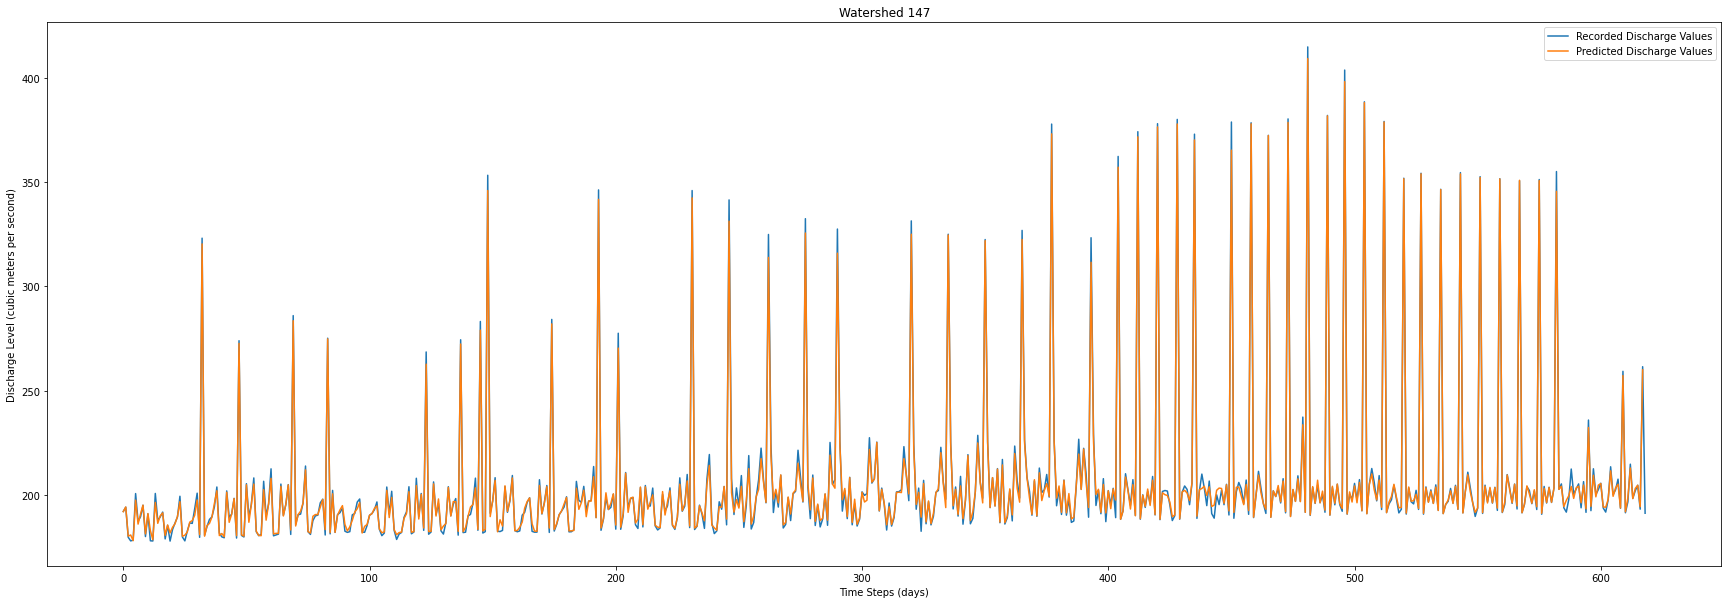

In [ ]:
# Athabasca

x = range(len(pred_list))
y1 = copy.avg.values[19:]
y2 = pred_list

f = plt.figure()
f.set_figwidth(30)
f.set_figheight(10)
plt.title("Lake Athabasca")
plt.xlabel("Time Steps (days)") # A track varies in timing, but averages to every 3 days.
plt.ylabel("Water Levels")
plt.plot(y1, label = 'Recorded Water Levels')
plt.plot(y2, label = 'Predicted Water Levels')




plt.legend()
plt.show()

In [ ]:
# Create a loop that will go through the predictions and actuals. 
smape = 0
for i in range(len(pred_list)):
  top = y2[i] - y1[i]
  top = np.abs(top)
  bottom = np.abs(y2[i]) + np.abs(y1[i])
  bottom = bottom/2
  answer = top/bottom
  answer = answer 
  smape += answer
total = smape/len(pred_list) * 100

print("The SMAPE score is:", total)

The SMAPE score is: 0.7472782121324825


In [ ]:
from sklearn.ensemble import RandomForestRegressor as rfr

In [ ]:
# Instantiate the model.
forest = rfr(n_estimators=300, verbose = 1)

In [ ]:
# Create the loop that will predict the next day's discharge. 
pred_list = [] # Create a list to store the predictions. 
for i in range(len(copy)):
  if i >= 20:
    num = i
    predict = copy.iloc[num-20:num-1] # Three years of data will be taken into account for each prediction. Up to three days before the target is taken. 
    target = copy.avg.iloc[num-19:num] # A three day prediction. 
    forest.fit(predict, target) 
    predictions = forest.predict(predict)
    day = predictions[18]
    pred_list.append(day) # Append the predictions to the list, for graphing. 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

In [ ]:
# Observe if the correct number of values are stored, and what they are. 
print(len(pred_list), pred_list[0:10])

618 [191.8163323224489, 195.83419672410938, 184.95767675482506, 183.43286898403343, 179.2837254741136, 196.37278310509635, 184.2154940565421, 190.34054020989134, 195.7324093122233, 181.32173142885316]


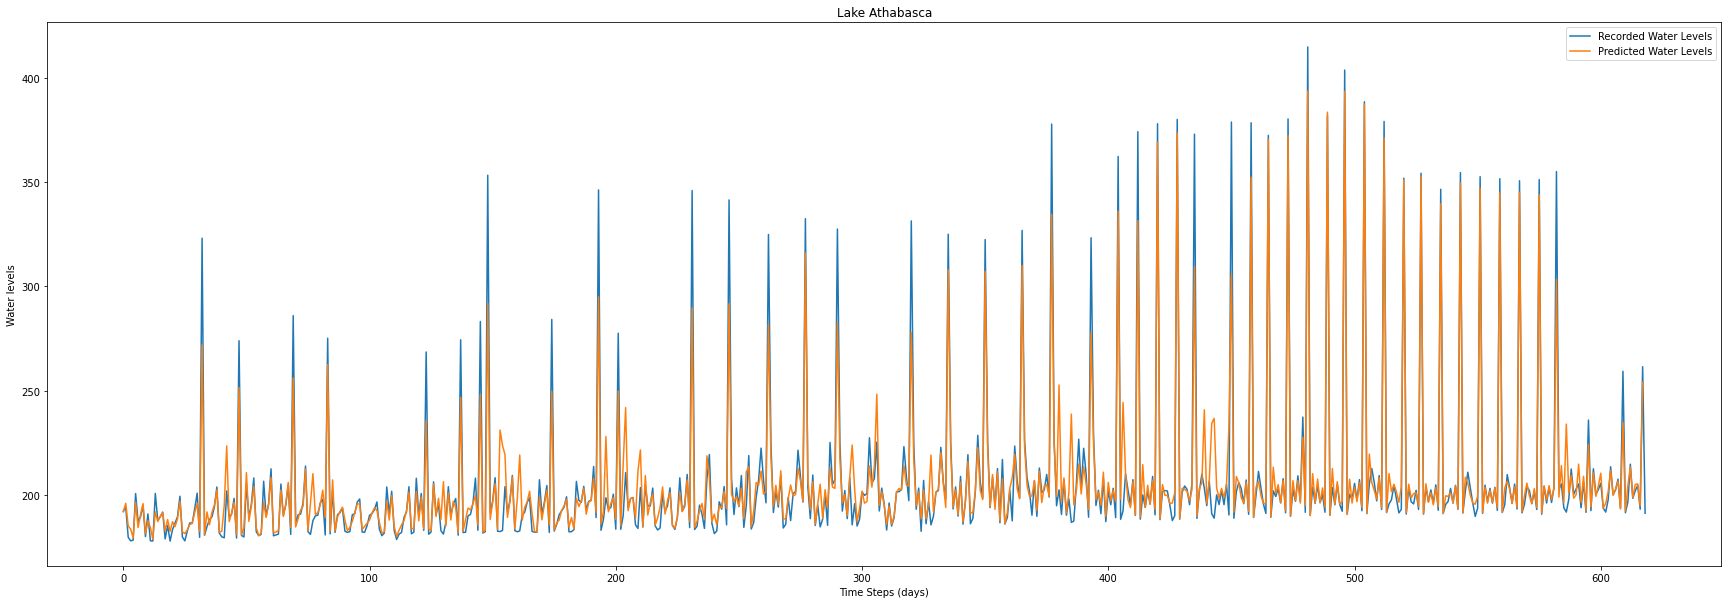

In [ ]:
# Athabasca

x = range(len(pred_list))
y1 = copy.avg.values[19:]
y2 = pred_list

f = plt.figure()
f.set_figwidth(30)
f.set_figheight(10)
plt.title("Lake Athabasca")
plt.xlabel("Time Steps (days)") # A track varies in timing, but averages to every 3 days.
plt.ylabel("Water levels")
plt.plot(y1, label = 'Recorded Water Levels')
plt.plot(y2, label = 'Predicted Water Levels')


plt.legend()
plt.show()

In [ ]:
# Create a loop that will go through the predictions and actuals. 
smape = 0
for i in range(len(pred_list)):
  top = y2[i] - y1[i]
  top = np.abs(top)
  bottom = np.abs(y2[i]) + np.abs(y1[i])
  bottom = bottom/2
  answer = top/bottom
  answer = answer 
  smape += answer
total = smape/len(pred_list) * 100

print("The SMAPE score is:", total)

The SMAPE score is: 2.5407061553473103


### Homer & Bob's Conclusion:
##### Random Forest Regressor outperformed XGboost, and performed well enough predicting the water level one time step into the future to replace the Kalman Filter. 